In [1]:
import pandas as pd
import matplotlib.pyplot as pp
from datetime import datetime, date, time, timedelta
import datetime

In [2]:
#data = pd.read_csv("E:\\BANKNIFTY.csv")
data = pd.read_csv("./BANKNIFTY.csv")
data['SMA_10'] = data['CLOSE'].rolling(10).mean()

In [6]:
def lots(notional_value,margin_requirement,capital,close):
    notional_value = lot_size*close
    capital_per_lot =  notional_value*margin_requirement
    total_lots = capital/capital_per_lot
    return(total_lots)

In [7]:
def trade_sheet(df,lot_size,notional_value, margin_requirement,capital,location):
    position = []
    entry = []
    exit = []
    size = []
    ret = []
    pnl = []
    pnl_temp = 0
    entry_temp =0
    total_lots = 0
    flag_long = False
    flag_short = False
    #Adding None to compensate the loss of entry when 1st position is opened  
    exit.append(None)
    pnl.append(None)
    ret.append(None)
    for index,row in df.iterrows():        
        if row['CLOSE']>row['SMA_10'] and flag_long == False:
            if flag_short == True:
                #exit short
                exit.append(row['CLOSE'])
                pnl_temp = (entry_temp-row['CLOSE'])*total_lots
                pnl.append(pnl_temp)
                return_temp = (pnl_temp/capital)*100
                ret.append(return_temp)
                flag_short = False
                
            position.append('Long')
            entry.append(row['CLOSE'])
            total_lots = lots(notional_value,margin_requirement,capital,row['CLOSE'])
            size.append(total_lots)
            entry_temp = row['CLOSE']
            flag_long = True
            
        elif row['CLOSE']<row['SMA_10'] and flag_short == False:
            if flag_long == True:
                #Exit long
                exit.append(row['CLOSE'])
                pnl_temp = (row['CLOSE']-entry_temp)*total_lots
                pnl.append(pnl_temp)
                return_temp = (pnl_temp/capital)*100
                ret.append(return_temp)
                flag_long = False
                
            position.append('Short')
            entry.append(row['CLOSE'])
            total_lots = lots(notional_value,margin_requirement,capital,row['CLOSE'])
            size.append(total_lots)
            entry_temp = row['CLOSE']
            flag_short = True
            
        else:
            position.append(None)
            entry.append(None)
            exit.append(None)
            size.append(None)
            ret.append(None)
            pnl.append(None)
            
#     print(len(position),len(exit),len(pnl))
    df['Position '] = position
    df['Entry'] = entry
    df['Exit'] = exit
    df['Size'] = size
    df['PnL'] = pnl
    df['%age Return'] = ret
    
    df.to_csv(location)
    

In [8]:
# Lot size as per present official Data
# Margin calculated using round((margin_asked_by_my_broker)/(today's_notional_value),1) {per lot}

lot_size = 40
notional_value = 0
margin_requirement = 0.1
capital = 10000000
#Specify the location where trade sheet is saved
# location = "E:\\trade_sheet.csv"
location = "./trade_sheet.csv"
trade_sheet(data,lot_size,notional_value, margin_requirement,capital,location)

In [10]:
def sharpe(location,capital):
    data = pd.read_csv(location)
    risk_free = 0
    std = data["CLOSE"].std()
    stat_return = (((data['PnL'].sum(skipna= True)))/capital)*100
    sharpe_ratio = (stat_return - risk_free)/std
    return(sharpe_ratio)

In [11]:
location = "./trade_sheet.csv"
sharpe(location,capital)

0.006828959771996567

In [19]:
def calmer(location,capital):
    
    data = pd.read_csv(location)
    capital_gain = []
    year = []
    for i in data['PnL']:
        if pd.notna(i):
            capital_gain.append(i + capital)
            
    for index,row in data.iterrows():
        try:
            y = datetime.datetime.strptime(row['TIMESTAMP'], '%d-%m-%Y')
            year.append(y.year)
        except:
            y = datetime.datetime.strptime(row['TIMESTAMP'], '%d/%m/%Y ')
            year.append(y.year)
            
    data['year'] = year
    year = set(year)
    unique_year = list(year)
    
    print(capital_gain)

In [20]:
calmer(location,capital)

[9988755.951636067, 10000804.369785625, 10197384.769689076, 9938675.161497992, 10122404.635768764, 9901085.998086723, 9959160.939552974, 9983811.60993839, 9978362.010464007, 10093219.86716588, 10207816.360864308, 9955074.470382946, 10001963.892978264, 10246613.082660556, 10070490.23701793, 9957336.9079765, 10005961.324368075, 9961045.739109825, 9954971.338061912, 9966359.621179944, 10075735.937026417, 9979610.08255238, 10034211.619702242, 10043146.748105204, 9951430.53454438, 9972734.022727385, 9991512.02665564, 9972198.089678701, 9960140.56394525, 9986111.962719971, 9956066.001609795, 9970710.18036918, 9983745.558325808, 9950229.032899473, 9982662.87572851, 9960715.252492983, 9998370.326618958, 9992993.539520882, 9982624.143635621, 9972903.349550107, 9994826.734386524, 10012864.314517094, 10062884.274423776, 9994527.180011515, 9813140.123409124, 10443807.352500465, 9934286.992537383, 9983334.517522046, 9988648.251869999, 9939523.880051428, 9926910.503442176, 9967085.089085784, 9970445

In [22]:
def avg_annual(location,capital):
    df = pd.read_csv(location)
    year = []
    for index,row in df.iterrows():
        try:
            y = datetime.datetime.strptime(row['TIMESTAMP'], '%d-%m-%Y')
            year.append(y.year)
        except:
            y = datetime.datetime.strptime(row['TIMESTAMP'], '%d/%m/%Y ')
            year.append(y.year)
            
    capital_gain = []
    for i in data['PnL']:
        if pd.notna(i):
            capital_gain.append(i + capital)
            
    year = set(year)
    unique_year = list(year)
    
    avg_annual_rate_of_interest = pow((capital_gain[len(capital_gain)-1]/capital),(1/len(unique_year))-1)
    return(avg_annual_rate_of_interest)
                                      


In [23]:
avg_annual(location,capital)

0.9904264205289488

In [25]:
def drawdown(location, capital):
    data = pd.read_csv(location)
    capital_gain = []
    for i in data['PnL']:
        if pd.notna(i):
            capital_gain.append(i + capital)
            
    print(capital_gain)
            

In [26]:
drawdown(location,capital)

[9988755.951636067, 10000804.369785625, 10197384.769689076, 9938675.161497992, 10122404.635768764, 9901085.998086723, 9959160.939552974, 9983811.60993839, 9978362.010464007, 10093219.86716588, 10207816.360864308, 9955074.470382946, 10001963.892978264, 10246613.082660556, 10070490.23701793, 9957336.9079765, 10005961.324368075, 9961045.739109825, 9954971.338061912, 9966359.621179944, 10075735.937026417, 9979610.08255238, 10034211.619702242, 10043146.748105204, 9951430.53454438, 9972734.022727385, 9991512.02665564, 9972198.089678701, 9960140.56394525, 9986111.962719971, 9956066.001609795, 9970710.18036918, 9983745.558325808, 9950229.032899473, 9982662.87572851, 9960715.252492983, 9998370.326618958, 9992993.539520882, 9982624.143635621, 9972903.349550107, 9994826.734386524, 10012864.314517094, 10062884.274423776, 9994527.180011515, 9813140.123409124, 10443807.352500465, 9934286.992537383, 9983334.517522046, 9988648.251869999, 9939523.880051428, 9926910.503442176, 9967085.089085784, 9970445

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
4251    225858.936529
4252    225858.936529
4253    225858.936529
4254    225858.936529
4255    225858.936529
Name: PnL, Length: 4256, dtype: float64
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4251   NaN
4252   NaN
4253   NaN
4254   NaN
4255   NaN
Name: PnL, Length: 4256, dtype: float64


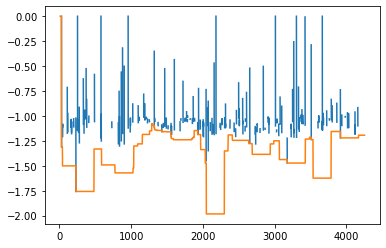

In [27]:
import pandas as pd
import matplotlib.pyplot as pp
import datetime

data = pd.read_csv(location)

# We are going to use a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = data['PnL'].rolling(window, min_periods=1).max()
Daily_Drawdown = data['PnL']/Roll_Max - 1.0

print(Roll_Max)
print(Daily_Drawdown)

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

# Plot the results
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
pp.show()